In [24]:
import pandas as pd
from itertools import combinations
from sklearn.metrics import roc_auc_score
import seaborn as sns
from scipy.stats import ttest_ind, wilcoxon
import matplotlib.pyplot as plt

Read the data

In [9]:
df = pd.read_csv("BSEP_classification_ChemProp_LightGBM.csv")

Select the random split

In [10]:
random_df = df.query("split == 'random'")

Summarize the data and get the AUC stats

In [11]:
summary_list = []
for k,v in random_df.groupby(["method","cv_cycle"]):
    auc_val = roc_auc_score(v.BSEP,v.BSEP_prob)
    method, cycle = k
    summary_list.append([method, cycle, auc_val])
auc_df = pd.DataFrame(summary_list,columns=["method","cycle","auc"])

Routines to draw the plots

In [62]:
def draw_displots(fig_df, method_1, method_2, ax):
    t10 = sns.palettes.color_palette("tab10")
    pal = {"CP_ST": t10[0], "CP_MT": t10[1], "LGBM": t10[2]}
    auc_1 = auc_df.query("method == @method_1").auc
    auc_2 = auc_df.query("method == @method_2").auc
    t1 = ttest_ind(auc_1,auc_2).pvalue
    w1 = wilcoxon(auc_1,auc_2).pvalue
    g1 = sns.kdeplot(x="auc",hue="method",data=auc_df.query("method in [@method_1,@method_2]"),ax=ax,palette=pal)
    g1.set_title(f"t-test {t1:.2f} | wilcoxon {w1:.2f}")    
    sns.move_legend(g1, "upper right",bbox_to_anchor=(1,1))
    g1.set_xlabel("AUC")
    g1.legend_.set_title("Method")
    plt.tight_layout()
    
def draw_boxplots(fig_df, method_1, method_2, ax):
    t10 = sns.palettes.color_palette("tab10")
    pal = {"CP_ST": t10[0], "CP_MT": t10[1], "LGBM": t10[2]}
    auc_1 = auc_df.query("method == @method_1").auc
    auc_2 = auc_df.query("method == @method_2").auc
    t1 = ttest_ind(auc_1,auc_2).pvalue
    w1 = wilcoxon(auc_1,auc_2).pvalue
    g1 = sns.boxplot(y="auc",x="method",data=auc_df.query("method in [@method_1,@method_2]"),ax=ax,palette=pal)
    g1.set_title(f"t-test {t1:.2f} | wilcoxon {w1:.2f}")    
    g1.set_ylabel("AUC")
    g1.set_xlabel("Method")
    plt.tight_layout()

Compare kernel density estimates

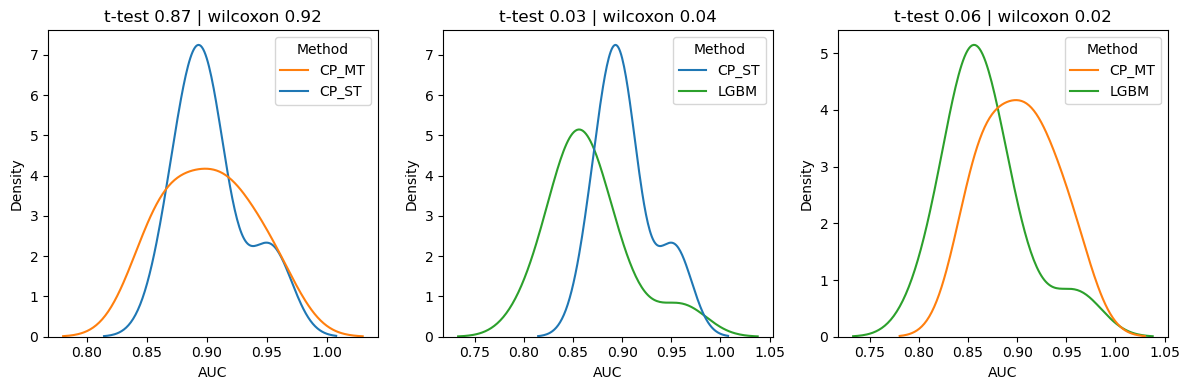

In [63]:
figure, axes = plt.subplots(1,3,figsize=(12,4))
for idx,(a,b) in enumerate(combinations(["CP_ST","CP_MT","LGBM"],2)):
    draw_displots(auc_df,a,b,axes[idx])

Compare boxplots

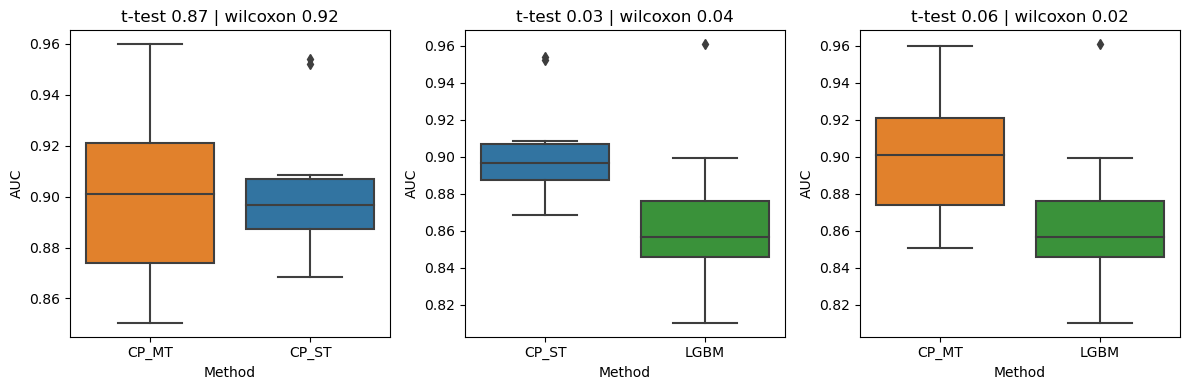

In [64]:
figure, axes = plt.subplots(1,3,figsize=(12,4))
for idx,(a,b) in enumerate(combinations(["CP_ST","CP_MT","LGBM"],2)):
    draw_boxplots(auc_df,a,b,axes[idx])